<a href="https://colab.research.google.com/github/SahilKumar777/ML-AI-Projects/blob/main/Linear%20Regression/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction (Linear Regression)**
## :- **Sahil Kumar 777**

### **Project Title**: **Predict House Prices Based on Features**  
---

#### **Objective**:  
Develop a linear regression model to predict house prices based on various features such as size, number of rooms, location, etc. You'll analyze patterns and relationships in the data to understand how each feature impacts house prices.

---

#### **Dataset**:  
Use the [Kaggle House Prices Dataset](https://www.kaggle.com/datasets/shree1992/housedata) or generate a synthetic dataset with meaningful features.

---

#### **Steps**:  

1. **Problem Statement**:  
   - Understand the goal: Predict house prices using features like area (sq. ft.), number of bedrooms, distance to city center, age of the property, etc.

2. **Data Collection and Preparation**:  
   - Download the dataset or create a synthetic dataset.
   - Explore the data: Check for missing values, outliers, and distributions.
   - Clean the data: Handle missing values and standardize or normalize features if necessary.

3. **Feature Engineering**:  
   - Identify important features (e.g., square footage, number of bedrooms).  
   - Encode categorical variables like location or type of house.  
   - Create new features if applicable, such as price per square foot.

4. **Exploratory Data Analysis (EDA)**:  
   - Visualize relationships between features and price (scatter plots, correlation heatmaps).  
   - Understand which variables are most strongly correlated with house prices.  

5. **Model Development**:  
   - Split data into training and testing sets.  
   - Train a simple Linear Regression model.  
   - Evaluate the model using metrics like R², Mean Squared Error (MSE), and Mean Absolute Error (MAE).  

6. **Insights**:  
   - Examine model coefficients to understand feature importance.  
   - Identify overfitting or underfitting and address them if necessary.  

7. **Visualization**:  
   - Plot actual vs predicted prices for the test data.  
   - Visualize residuals to check model assumptions.  

8. **Stretch Goals (Optional)**:  
   - Compare with polynomial regression or regularized models like Ridge or Lasso.  
   - Introduce new features (e.g., crime rates, school ratings) to see if predictions improve.  
   - Deploy your model using a simple web app (e.g., Flask or Streamlit) to make predictions interactively.

---

#### **Expected Outcome**:  
- A trained Linear Regression model capable of predicting house prices with reasonable accuracy.  
- A deeper understanding of how different features influence housing prices.

---

## 1. Dataset details
---


### Load Dataset
* Importing Required Libraries
* Loading Dataset
* Dataset Preview

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
#import train_test_split

In [2]:
# Mounting google Drive to access dataset stored on gooogle drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load the dataset into dataframe
df = pd.read_csv('drive/MyDrive/Colab Notebooks/House Price Prediction Linear regression/HPPdataset.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Dataset Overview
* Dataset size
* Features Details
* Descriptive Statistics


In [ ]:
# Get Size of dataset

print("Number Of Rows in Dataset = ",df.shape[0])
print("Number Of Features in Dataset = ",df.shape[1])

Number Of Rows in Dataset =  4600
Number Of Features in Dataset =  18


#### Know About Features

In [ ]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

 Features identfied from dataset  
 0.   date           :- Timestamp of data recorded
 1.   price          :- Price of House in Dollars
 2.   bedrooms       :- Number of Bedrooms in House
 3.   bathrooms      :- Number of Bathrooms in House
 4.   sqft_living    :- Living area in Square Feet
 5.   sqft_lot       :- Lot Area in Square Feet
 6.   floors         :- Number of floors in House
 7.   waterfront     :- If property is water front or not
 8.   view           :- type of view from the property
 9.   condition      :- Condition of the house
 10.  sqft_above     :- Square Feet above ground level  
 11.  sqft_basement  :- Square feet of the basement
 12.  yr_built       :- Year in which house build
 13.  yr_renovated   :- year in which house renovated   
 14.  street         :- Street address of the house
 15.  city           :- City in which house is located
 16.  statezip       :- State and zipcode
 17.  country        :- Country in which house is located

*   Features with float values = 4
*   Features with integer values = 9
*   Categorical features = 5

In [ ]:
numerical_columns = [feature for feature in df.columns if df[feature].dtype=='int64' or df[feature].dtype=='float64']
categorical_columns = [feature for feature in df.columns if df[feature].dtype=='object']

print('Numerical Columns =',numerical_columns)
print('Categorical Columns =',categorical_columns)

Numerical Columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
Categorical Columns = ['date', 'street', 'city', 'statezip', 'country']


#### Descriptive Statistic Summary

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## 2. Data Preprocessing
---

### Data Cleaning



#### Missing Values

In [ ]:
# Check Missing data percentage

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
date,0,0.0
price,0,0.0
statezip,0,0.0
city,0,0.0
street,0,0.0
yr_renovated,0,0.0
yr_built,0,0.0
sqft_basement,0,0.0
sqft_above,0,0.0
condition,0,0.0


In [ ]:
#Handle Missing Values

#### Duplicate Values

In [ ]:
# Check Duplicate rows
df.duplicated().sum()

0

In [ ]:
#Handle Duplicate Values

#### Check no. of Uniques values in each column

In [ ]:
# Check the number of unique values in each column
df.nunique()

,0
date,70
price,1741
bedrooms,10
bathrooms,26
sqft_living,566
sqft_lot,3113
floors,6
waterfront,2
view,5
condition,5


#### Outliers
* Feature Values graphical analysis
* Distribution (Histogram) Analysis
* Boxplots Analysis
* Calculating and removing outliers

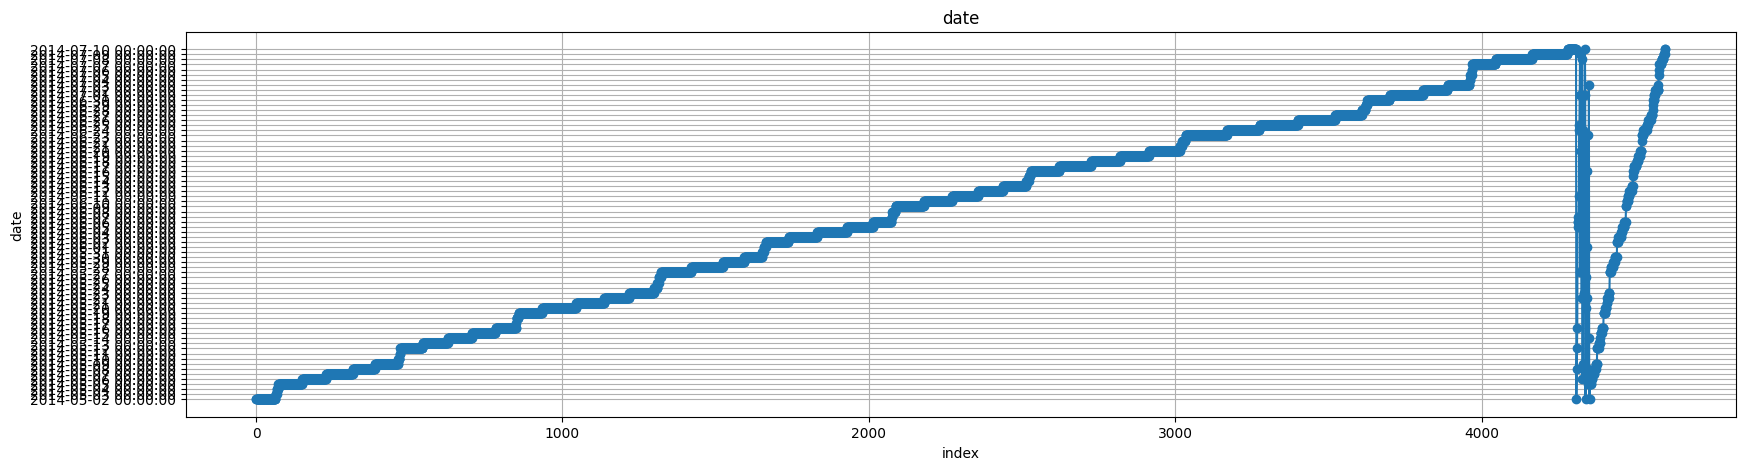

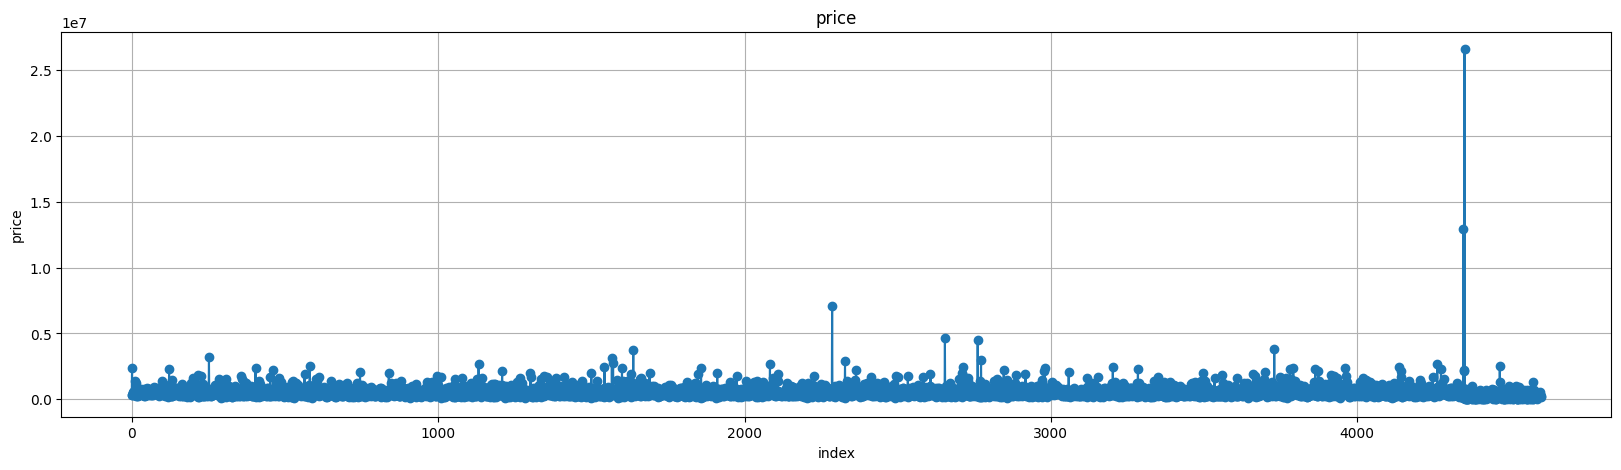

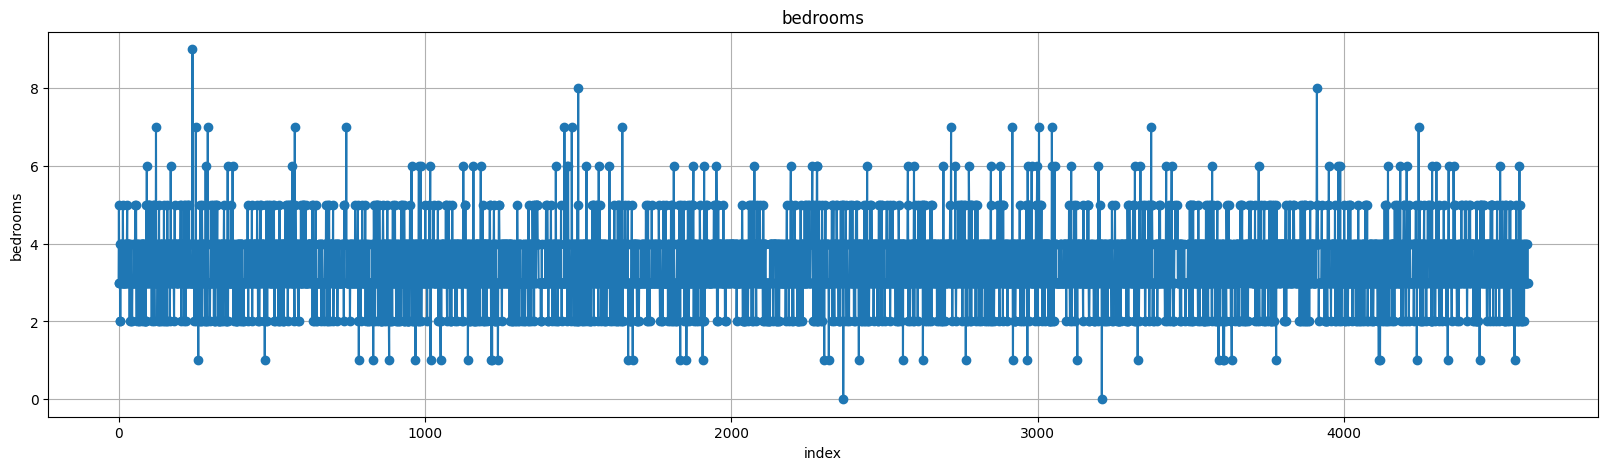

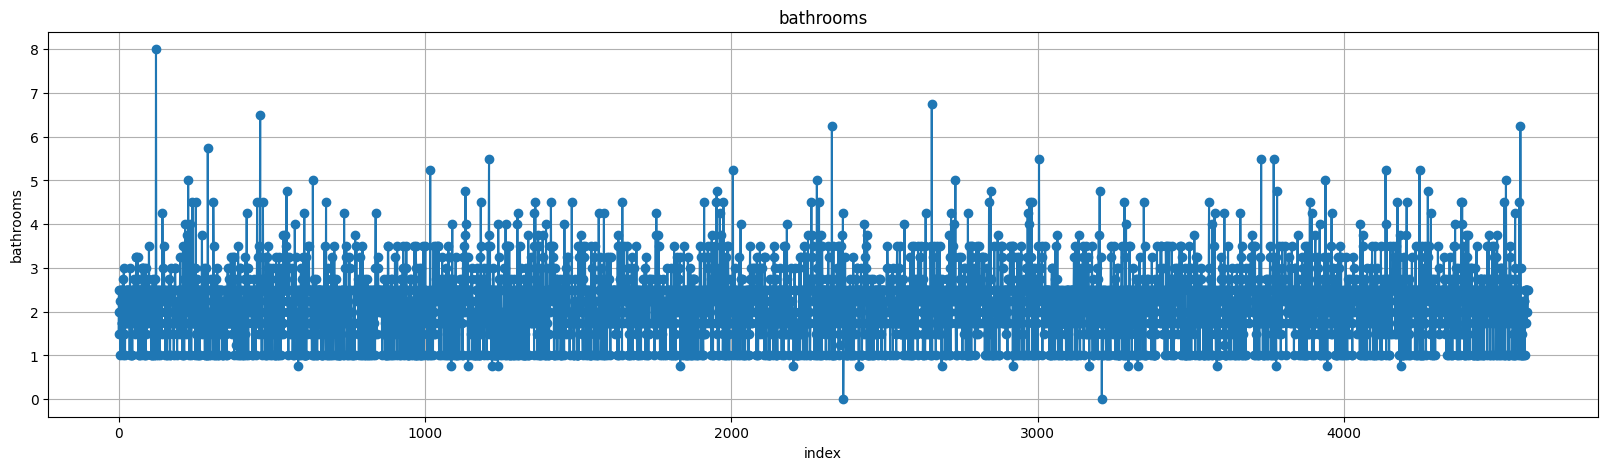

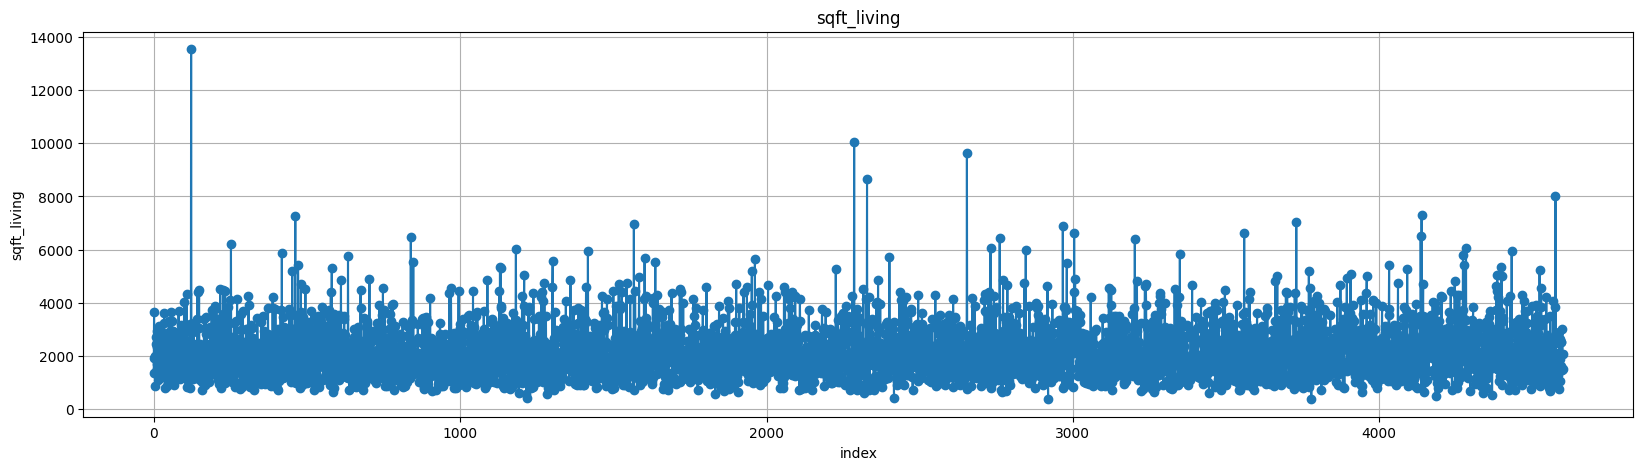

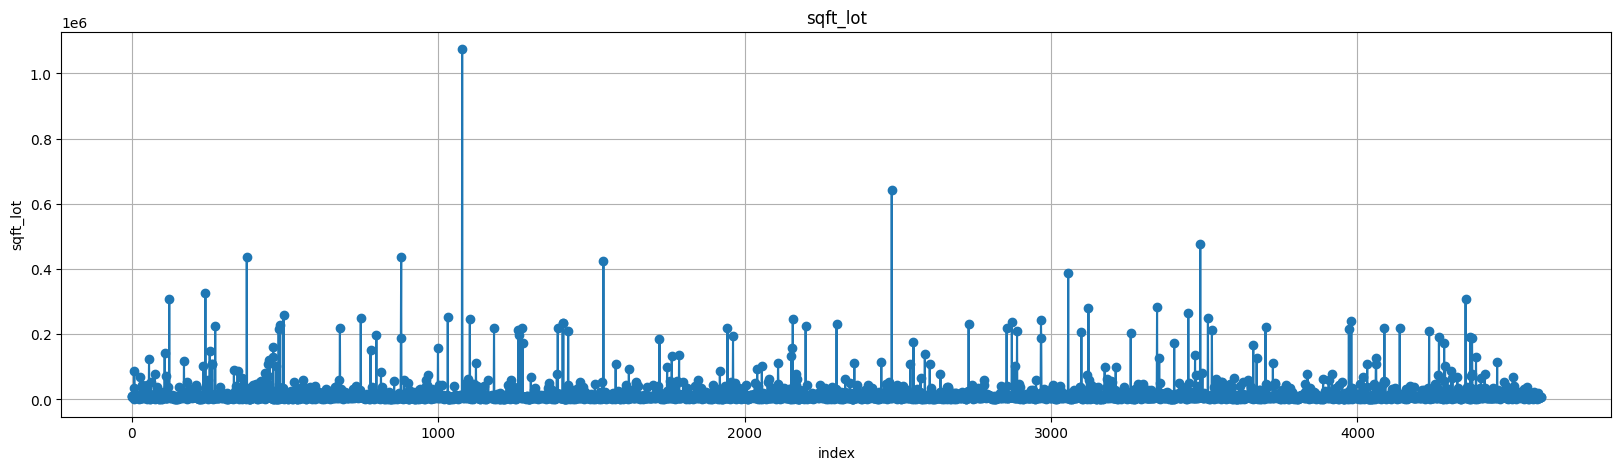

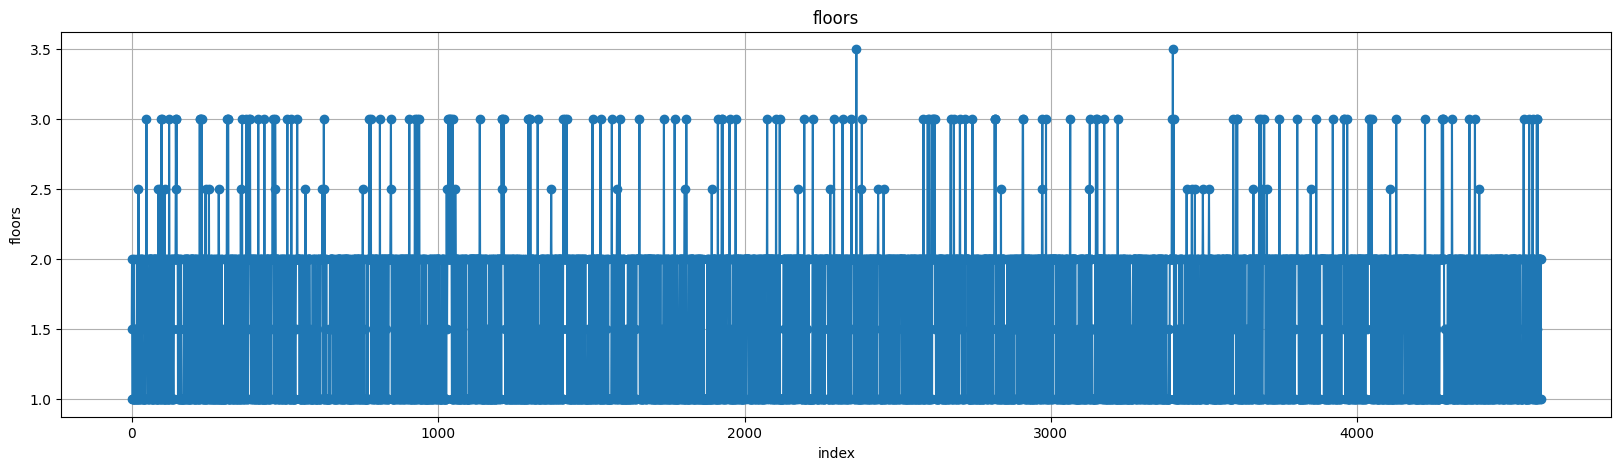

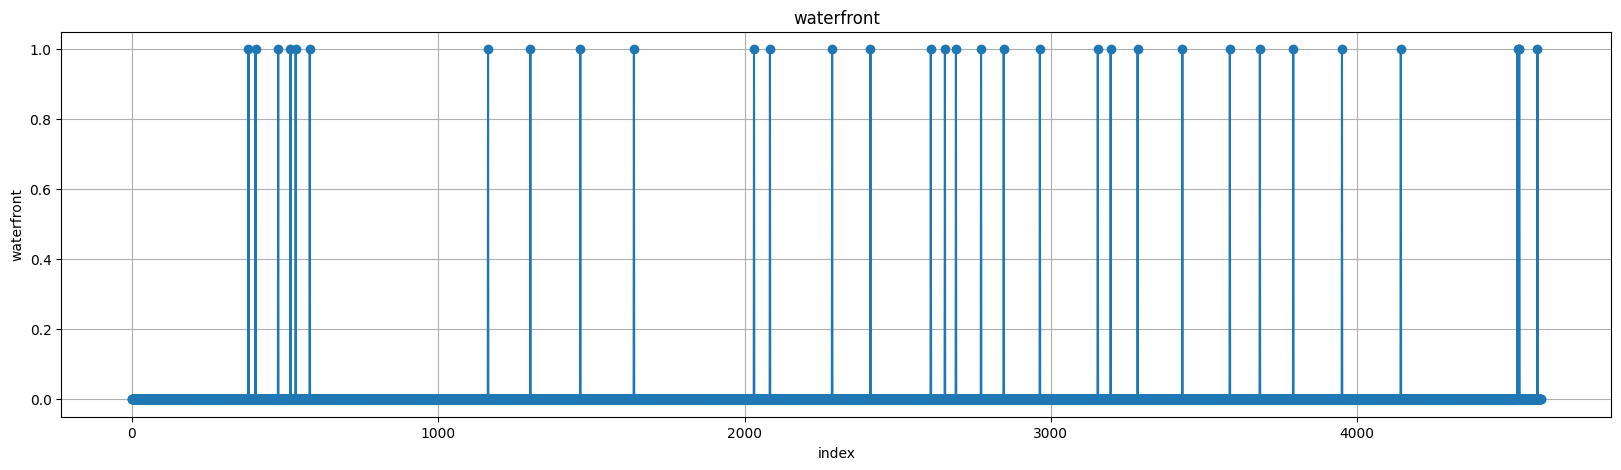

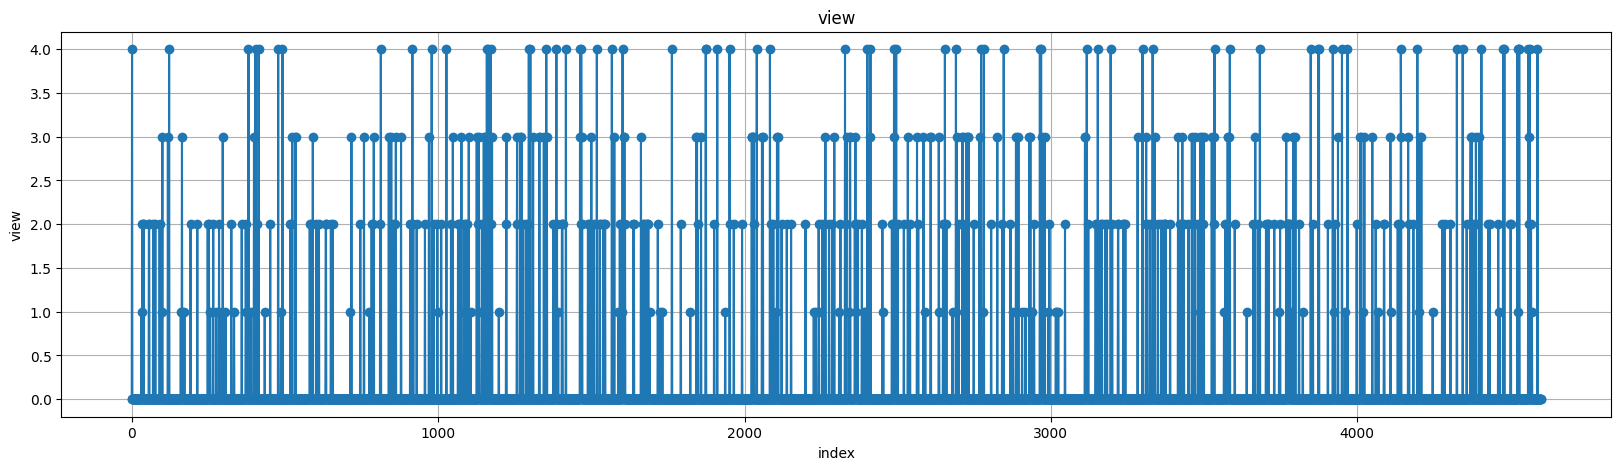

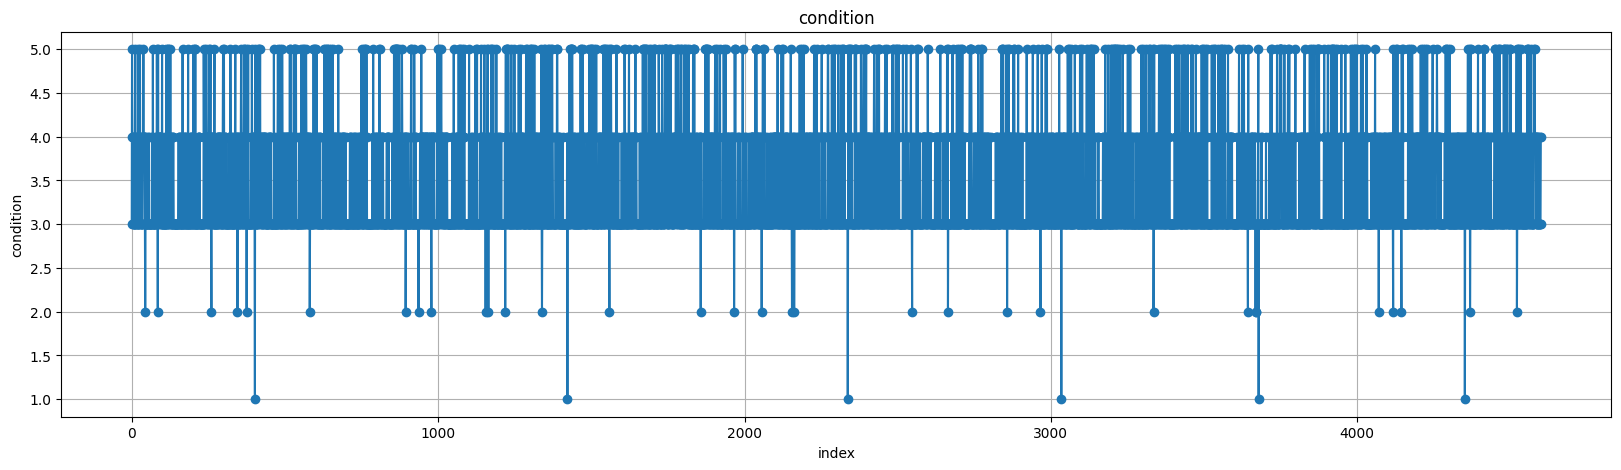

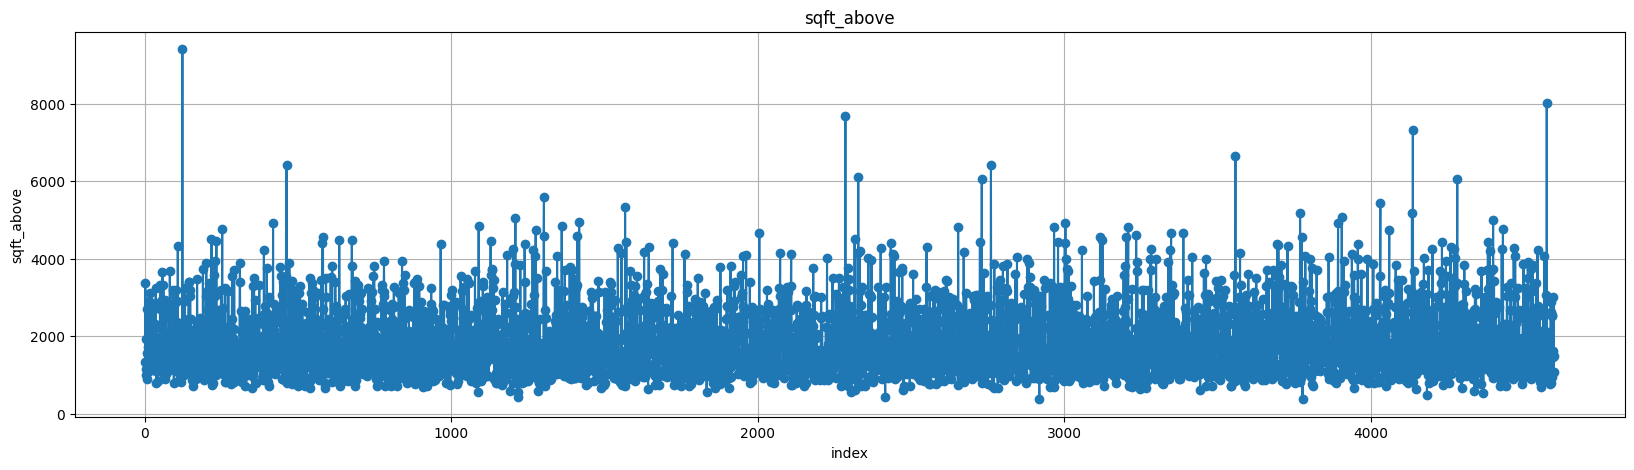

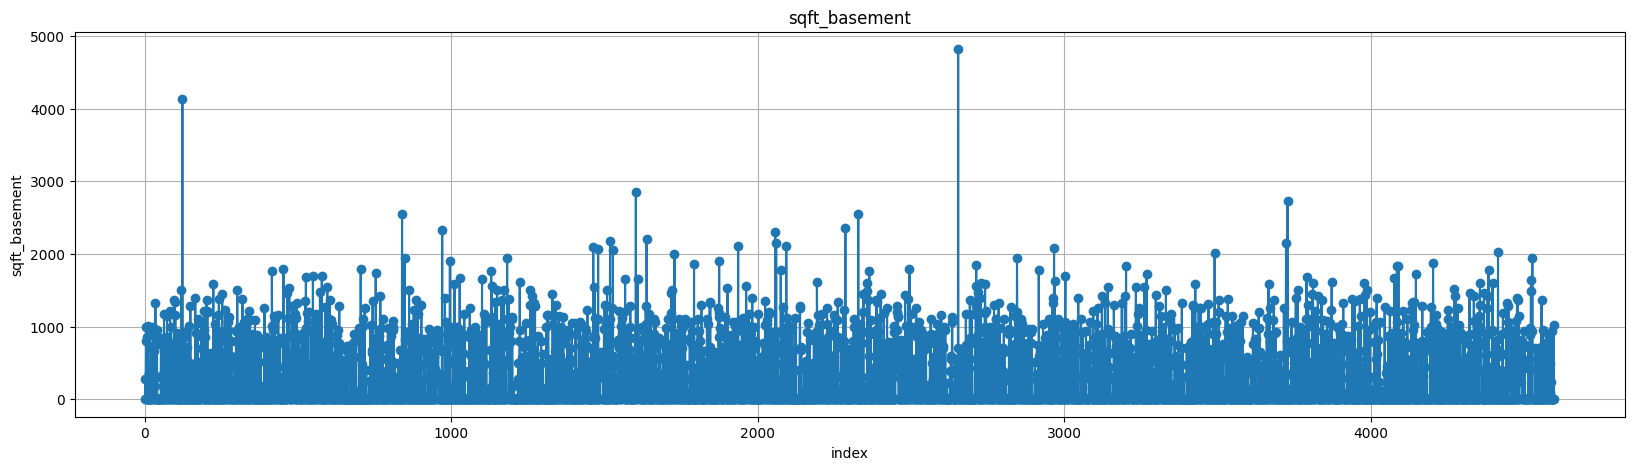

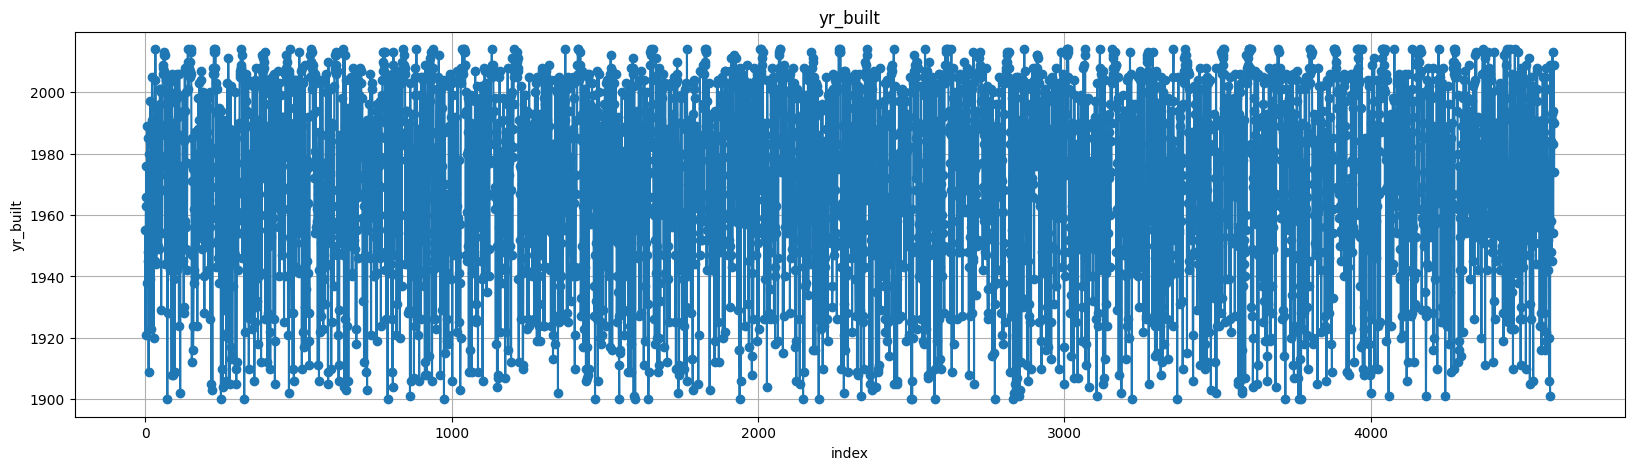

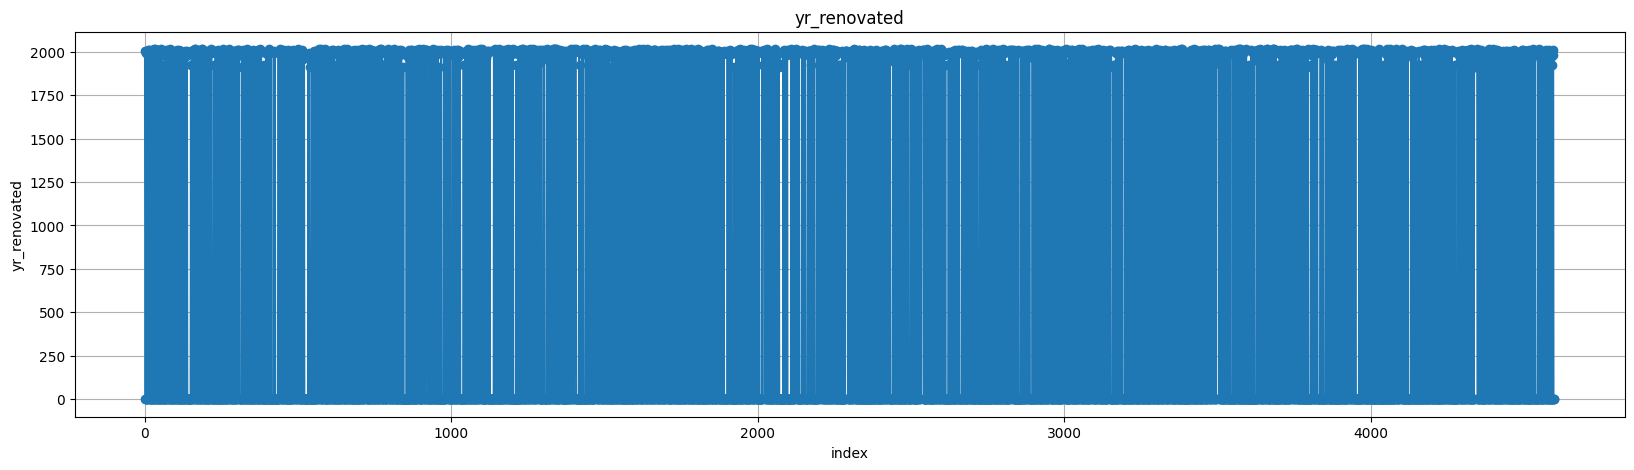

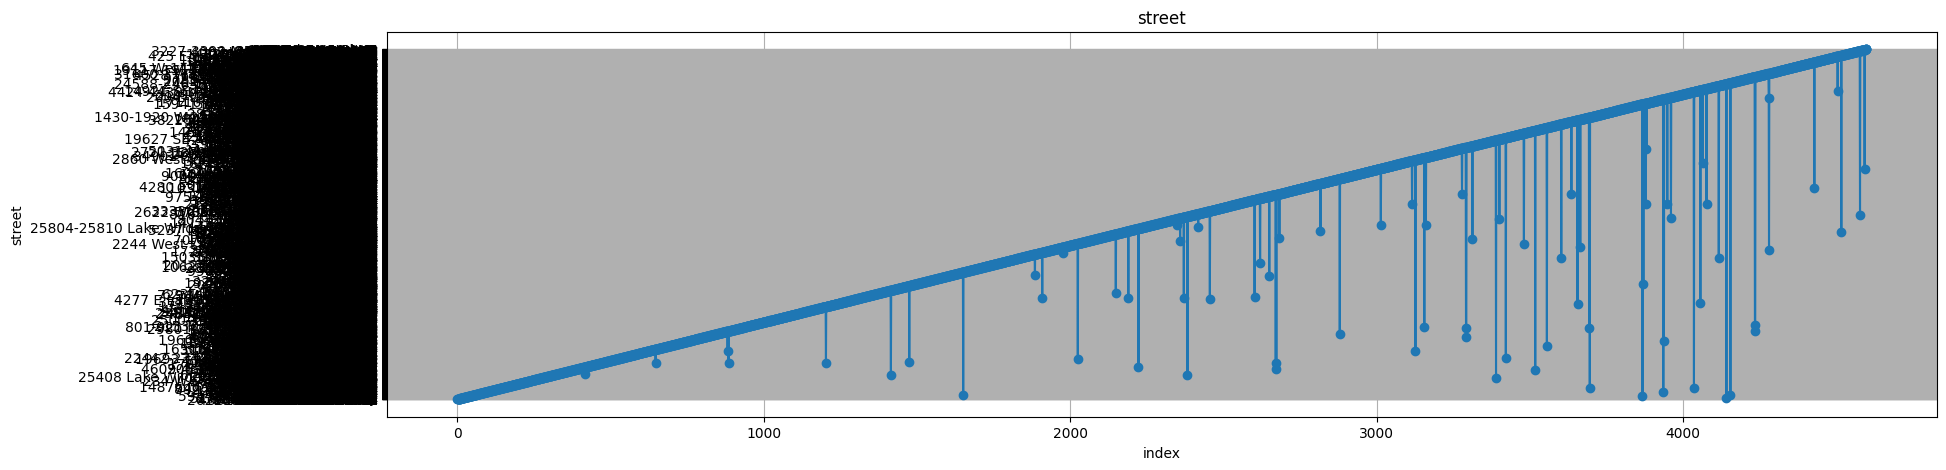

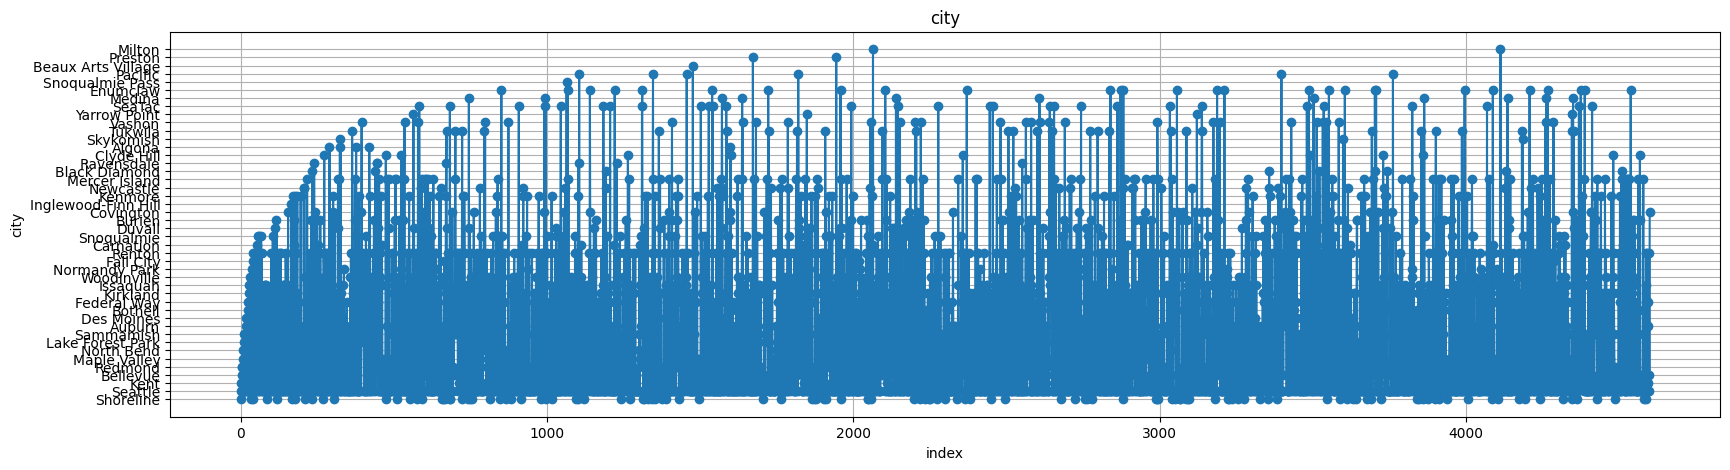

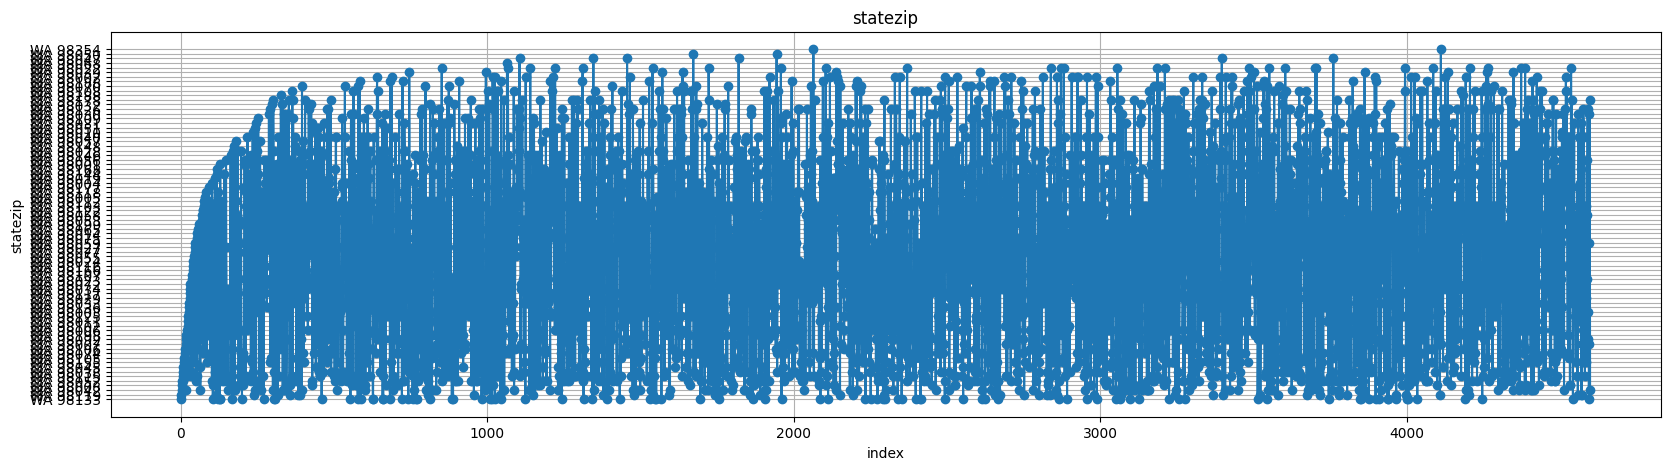

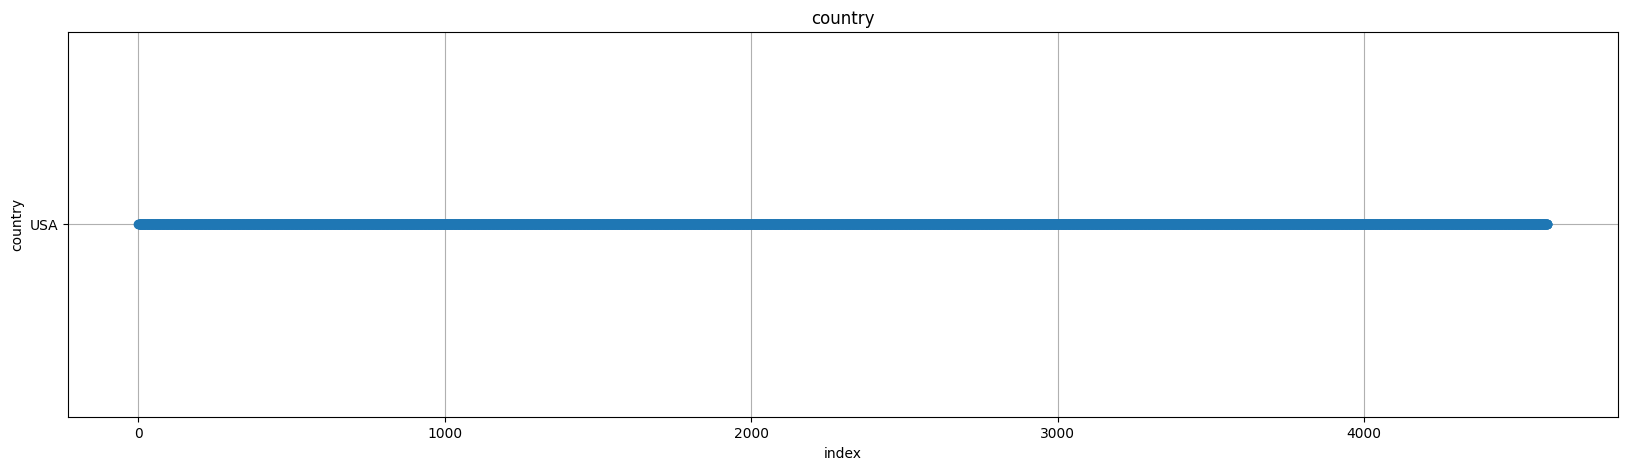

In [ ]:
# ploting values graph

for col in df.columns :
  plt.figure(figsize=(20, 5))
  plt.plot(df.index, df[col], marker='o', linestyle='-')
  plt.title(col)
  plt.xlabel('index')
  plt.ylabel(col)
  plt.grid(True)
  plt.show()

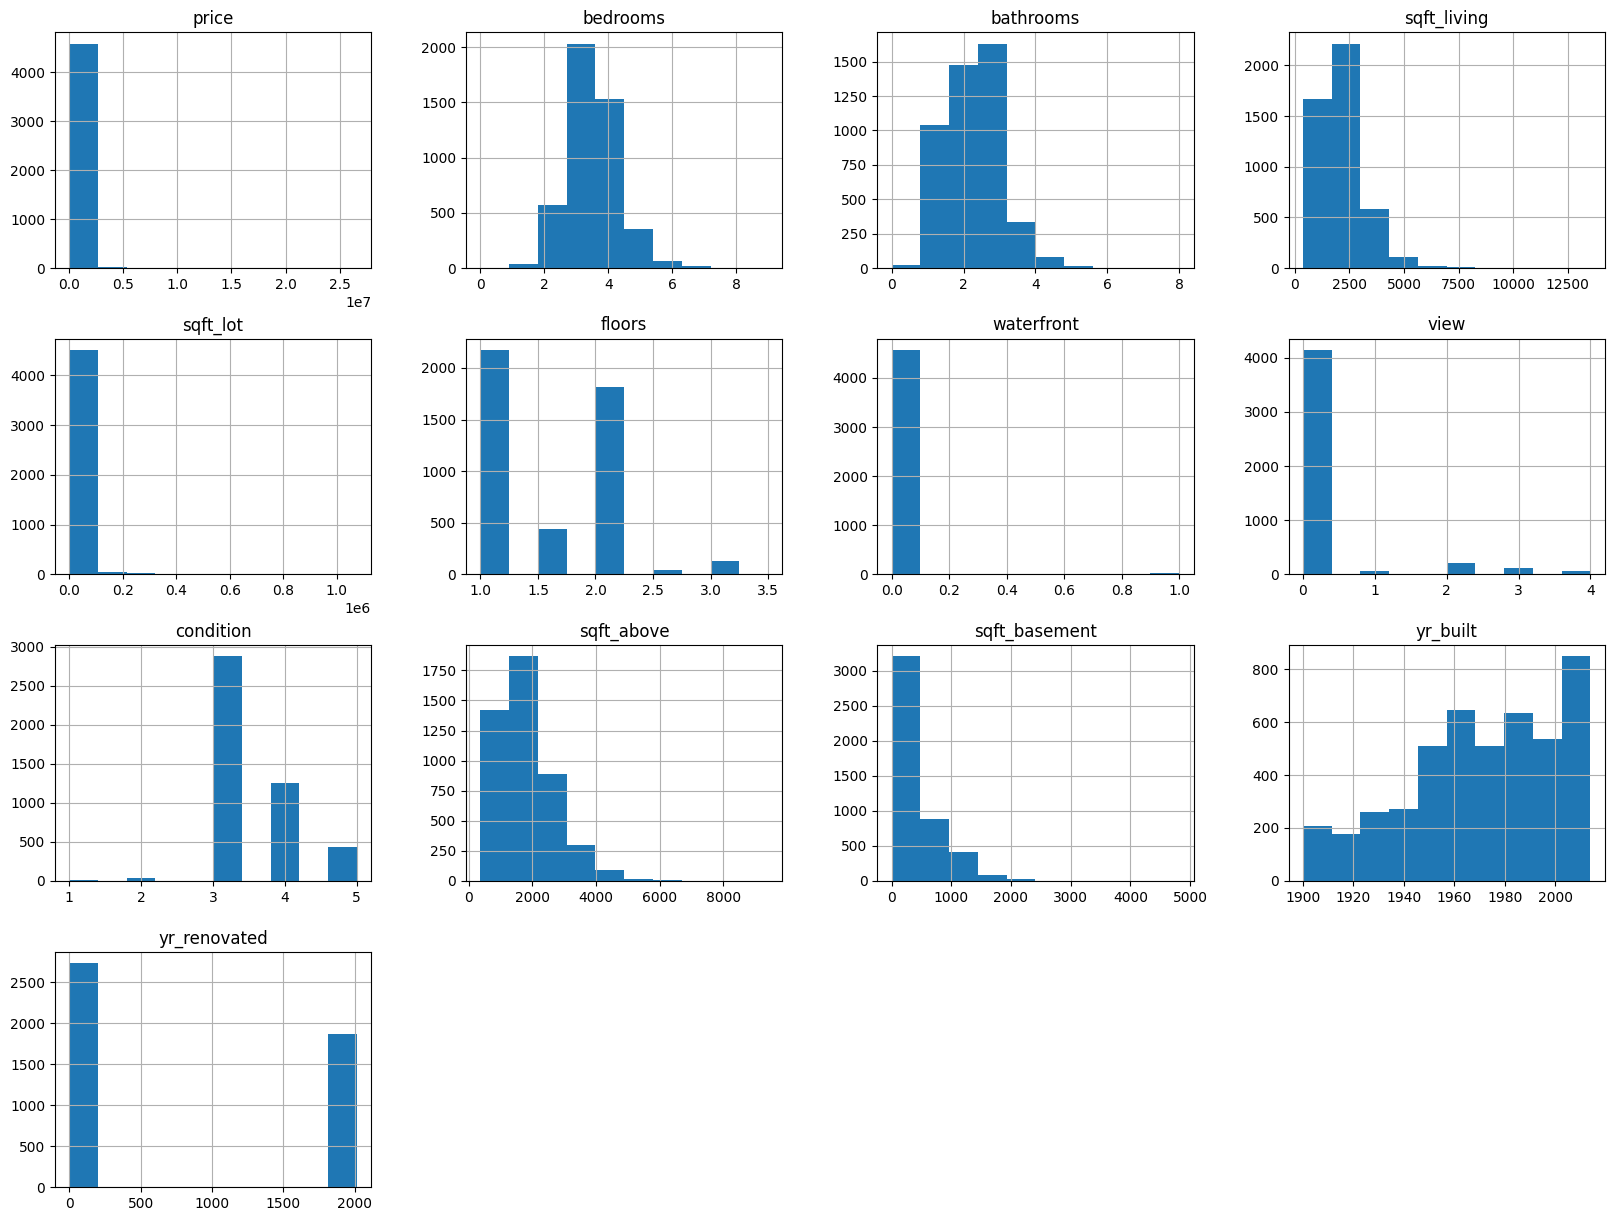

In [ ]:
df.hist(figsize=(20,15))
plt.show()

**Insights**
1. Following features have right skewed distributions
  * Price, sqft_lot, waterfront, sqft_above, sqft_basement



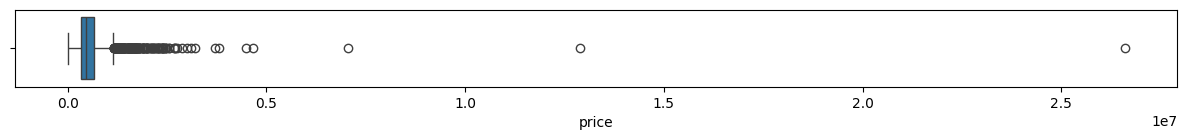

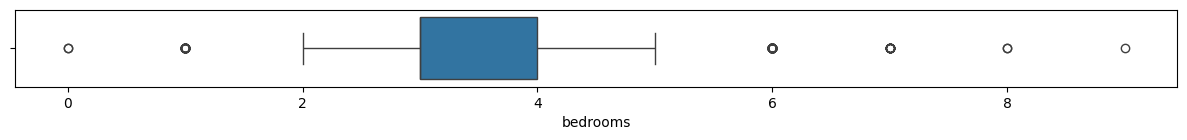

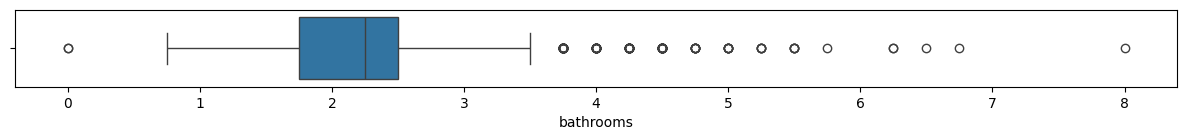

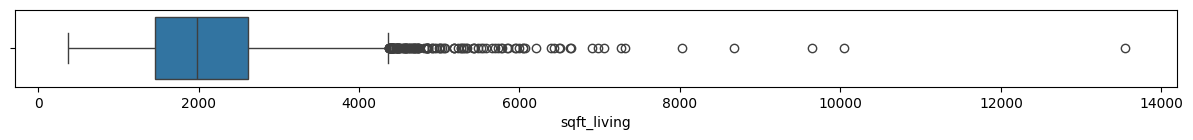

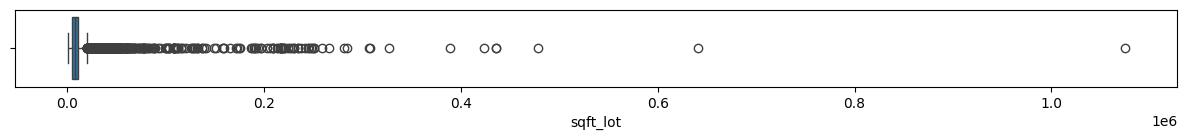

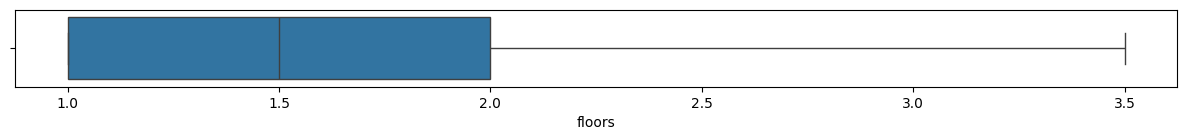

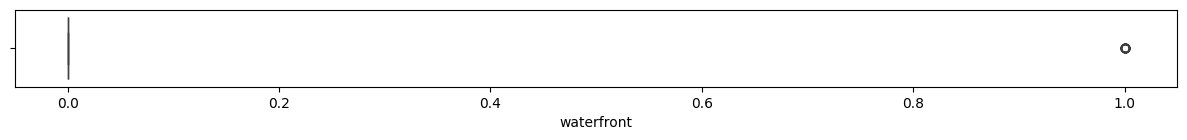

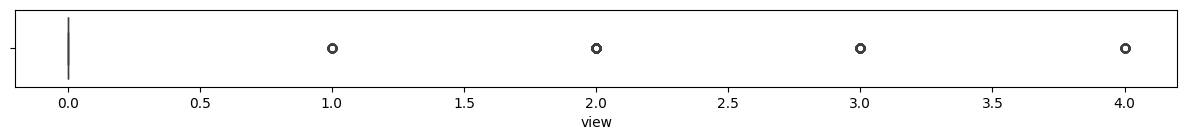

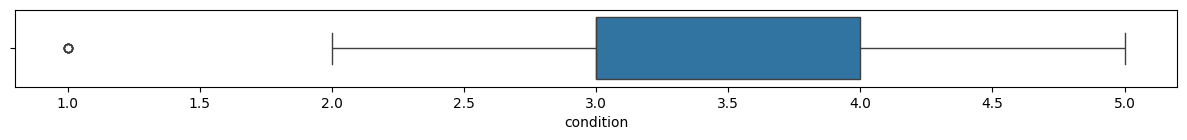

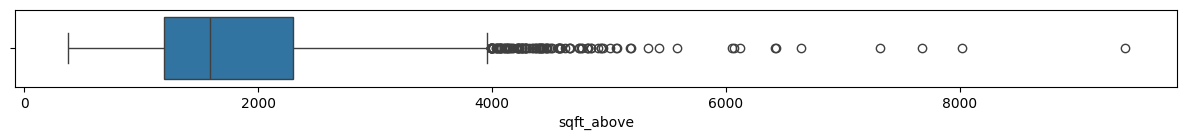

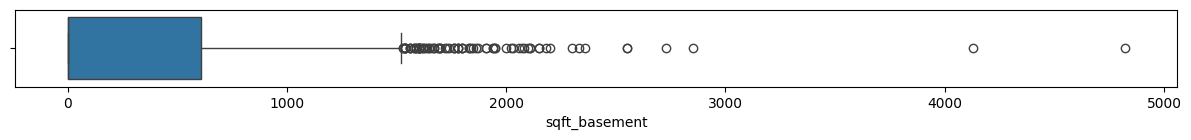

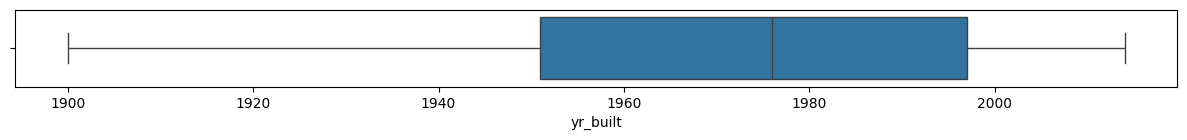

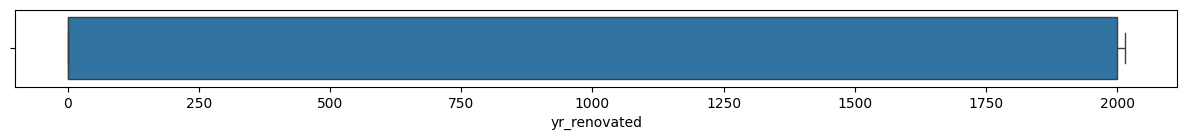

In [14]:
#Boxplots
#df=df.select_dtypes(exclude=['object'])

for column in df:
    plt.figure(figsize=(15,1))
    sns.boxplot(data=df, x=column)

**Insights**
1. Following features contain outliers
  * Price, sqft_lot, sqft_living, waterfront, sqft_above, sqft_basement

#####Feature (Price)

In [ ]:
# Skewness calculation
from scipy.stats import skew, kurtosis

price_skewness = skew(df['price'])
price_kurtosis = kurtosis(df['price'])

print(f"Skewness: {price_skewness}, Kurtosis: {price_kurtosis}")

Skewness: 24.78284782965085, Kurtosis: 1043.216027112282


**Feature Insights:**
* Right skewed Data.
* **Skewness: 24.78** - It indicates that the distribution is highly right-skewed. The right tail is extremely long or fat, suggesting that there are many extreme high values (outliers) that are significantly larger than the bulk of the data.
* **Kurtosis: 1043.22** - It indicates that the distribution has very heavy tails and a sharp peak compared to a normal distribution. In this case, the distribution is leptokurtic, which means there are many more outliers than would typically be found in a normal distribution
* Lot of Outliers

In [4]:
# Calculating and removing outliers

print("Number of Outliers in feature (Price) = ", df[df.price>2000000].shape[0])
df1=df[df['price']<=2000000]

Number of Outliers in feature (Price) =  47


After Removing Outliers


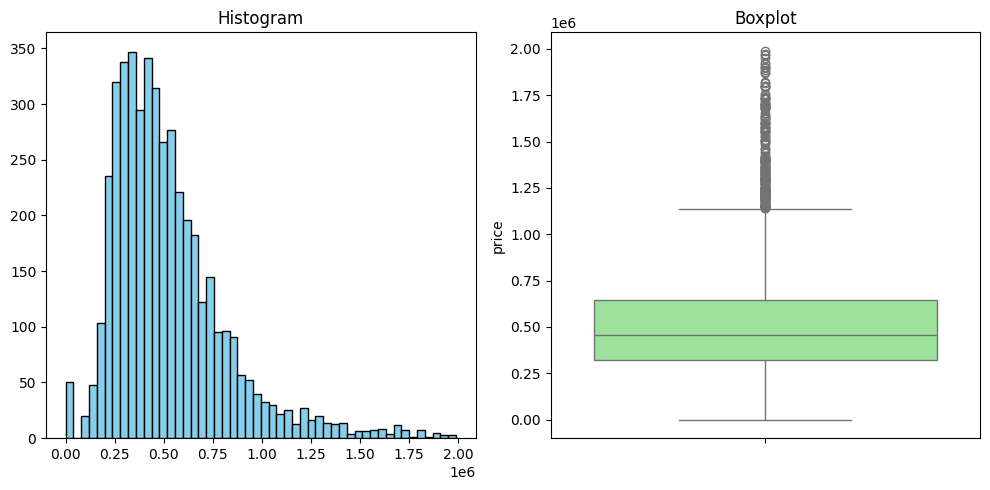

In [ ]:
print("After Removing Outliers")

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram
ax1.hist(df1.price, bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Histogram')

# Plot boxplot
sns.boxplot(df1.price, ax=ax2, color='lightgreen')
ax2.set_title('Boxplot')

# Display the plots
plt.tight_layout()
plt.show()

Other Insights
* Price can never be zero for any house, but feature contains some zero values

In [5]:
# Remove Outliers or Invalid values
print("Number of Zero Values of price = ",df1.price[df1.price==0].shape[0])
df2=df1[df1.price!=0]

Number of Zero Values of price =  49


##### Feature (sqft_living)

In [ ]:
# sqft_living Skewness calculation

sqft_living_skewness = skew(df2['sqft_living'])
sqft_living_kurtosis = kurtosis(df2['sqft_living'])

print(f"Skewness: {sqft_living_skewness}, Kurtosis: {sqft_living_kurtosis}")

Skewness: 1.0345956183678786, Kurtosis: 1.6898903110904948


In [6]:
# Calculating and removing outliers

print("Number of Outliers (sqft_living) = ", df2[df2.sqft_living>6000].shape[0])
if df2[df2.sqft_living>6000].shape[0] > 0 :
  df2=df2[df2['sqft_living']<=6000]

Number of Outliers (sqft_living) =  8


After Removing Outliers


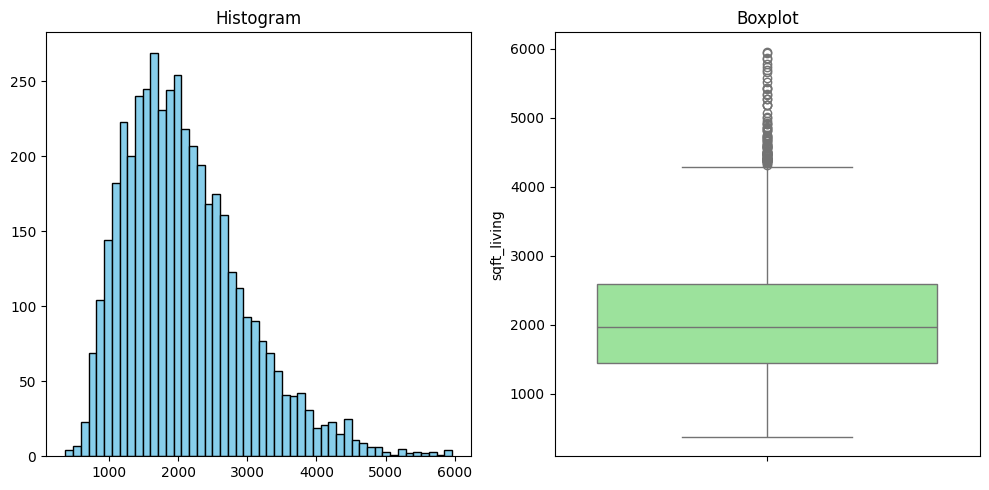

In [ ]:
print("After Removing Outliers")

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram
ax1.hist(df2.sqft_living, bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Histogram')

# Plot boxplot
sns.boxplot(df2.sqft_living, ax=ax2, color='lightgreen')
ax2.set_title('Boxplot')

# Display the plots
plt.tight_layout()
plt.show()

##### Feature (sqft_lot)

In [ ]:
# sqft_living Skewness calculation

sqft_lot_skewness = skew(df2['sqft_lot'])
sqft_lot_kurtosis = kurtosis(df2['sqft_lot'])

print(f"Skewness: {sqft_lot_skewness}, Kurtosis: {sqft_lot_kurtosis}")

Skewness: 11.89340367977672, Kurtosis: 240.81585197068623


**Feature Insights:**
* Right skewed Data.
* **Skewness: 11.90** - It indicates that the distribution is highly right-skewed. The right tail is extremely long or fat, suggesting that there are many extreme high values (outliers) that are significantly larger than the bulk of the data.
* **Kurtosis: 240.80** - It indicates that the distribution has very heavy tails and a sharp peak compared to a normal distribution. In this case, the distribution is leptokurtic, which means there are many more outliers than would typically be found in a normal distribution
* Lot of Outliers

In [ ]:
# Calculating outliers

print("Number of Outliers (sqft_lot) = ", df2[df2.sqft_lot>300000].shape[0])
#df2[df2.sqft_lot>300000]

Number of Outliers (sqft_lot) =  6


In [7]:
# Removing Outliers
if df2[df2.sqft_lot>300000].shape[0] > 0 :
  df2=df2[df2['sqft_lot']<=300000]


After Removing Outliers


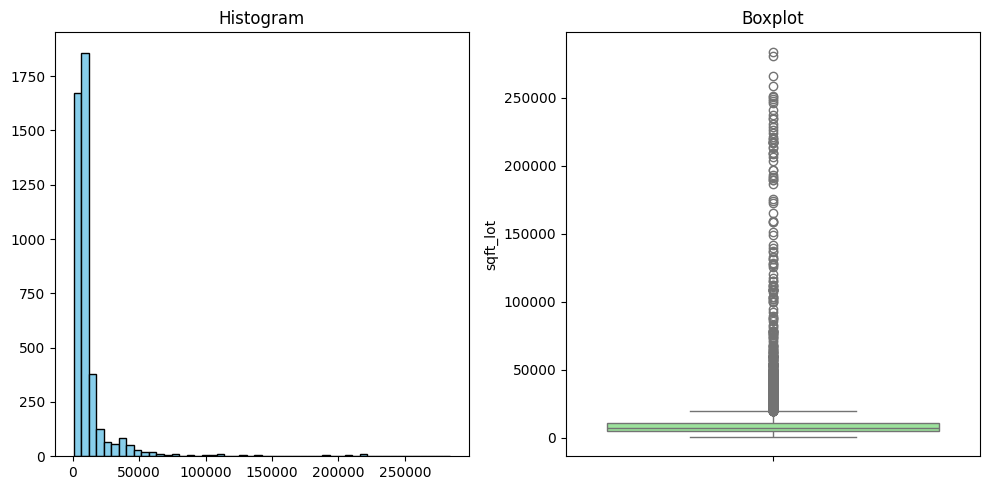

In [ ]:
print("After Removing Outliers")

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram
ax1.hist(df2.sqft_lot, bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Histogram')

# Plot boxplot
sns.boxplot(df2.sqft_lot, ax=ax2, color='lightgreen')
ax2.set_title('Boxplot')

# Display the plots
plt.tight_layout()
plt.show()

##### Feature (sqft_basement)

In [ ]:
# sqft_living Skewness calculation

sqft_basement_skewness = skew(df2['sqft_basement'])
sqft_basement_kurtosis = kurtosis(df2['sqft_basement'])

print(f"Skewness: {sqft_basement_skewness}, Kurtosis: {sqft_basement_kurtosis}")

Skewness: 1.3274455037414445, Kurtosis: 0.9516219770360621


In [ ]:
#df2.sqft_basement.sort_values(ascending=False)[:10]
#df2.sqft_basement.value_counts()


In [ ]:
# Calculating outliers

print("Number of Outliers (sqft_basement) = ", df2[df2.sqft_basement>2500].shape[0])
#df2[df2.sqft_lot>300000]

Number of Outliers (waterfront) =  1


In [8]:
# Removing Outliers
if df2[df2.sqft_basement>2500].shape[0] > 0 :
  df2=df2[df2['sqft_basement']<=2500]


After Removing Outliers


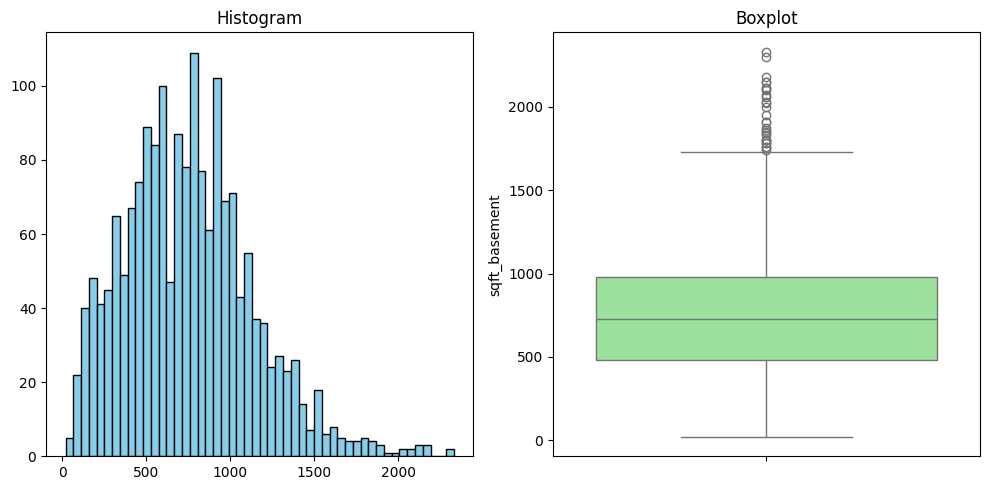

In [ ]:
print("After Removing Outliers")

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram
ax1.hist(df2.sqft_basement[df2.sqft_basement>0], bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Histogram')

# Plot boxplot
sns.boxplot(df2.sqft_basement[df2.sqft_basement>0], ax=ax2, color='lightgreen')
ax2.set_title('Boxplot')

# Display the plots
plt.tight_layout()
plt.show()

## 3. Feature Engineering


### Feature Selection
* Finding Correlaton (Numerical Features)
* Categorical Features
* Removing unnecessary features


In [ ]:
# Correlation
corr=df2.select_dtypes("number").corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.328352,0.506578,0.669899,0.095913,0.282055,0.104052,0.342704,0.059898,0.568219,0.284047,0.027685,-0.049540
bedrooms,0.328352,1.000000,0.533675,0.594076,0.071637,0.167167,-0.026370,0.085449,0.020343,0.469003,0.315235,0.142455,-0.058688
bathrooms,0.506578,0.533675,1.000000,0.736273,0.100656,0.495198,0.022849,0.163561,-0.129363,0.660839,0.246279,0.481716,-0.224396
sqft_living,0.669899,0.594076,0.736273,1.000000,0.228628,0.346806,0.033506,0.260689,-0.067770,0.862762,0.397617,0.306852,-0.127812
sqft_lot,0.095913,0.071637,0.100656,0.228628,1.000000,-0.014853,0.029872,0.057528,-0.010530,0.241458,0.010682,0.077592,-0.014768
floors,0.282055,0.167167,0.495198,0.346806,-0.014853,1.000000,0.010761,0.018653,-0.277612,0.532296,-0.285092,0.469897,-0.234413
waterfront,0.104052,-0.026370,0.022849,0.033506,0.029872,0.010761,1.000000,0.320259,0.019621,0.020267,0.029003,-0.037900,0.019963
view,0.342704,0.085449,0.163561,0.260689,0.057528,0.018653,0.320259,1.000000,0.055706,0.128452,0.278706,-0.067280,0.033318
condition,0.059898,0.020343,-0.129363,-0.067770,-0.010530,-0.277612,0.019621,0.055706,1.000000,-0.187095,0.206476,-0.399134,-0.185071
sqft_above,0.568219,0.469003,0.660839,0.862762,0.241458,0.532296,0.020267,0.128452,-0.187095,1.000000,-0.120874,0.428217,-0.165131


<Axes: >

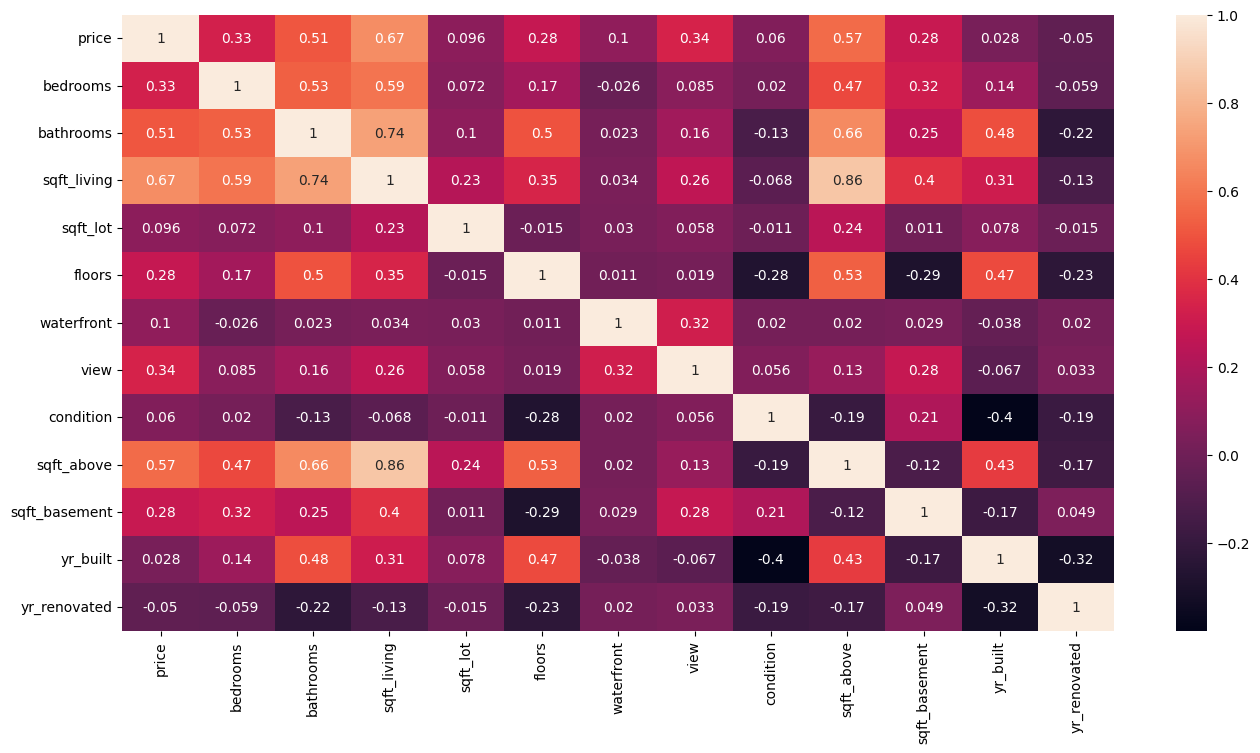

In [ ]:
# Correlation visualisation (Heatmap)

plt.figure(figsize=(16,8))
sns.heatmap(df2.select_dtypes('number').corr(),annot=True)

Insights
* Highly corelated to price is sqft_living
* Least Correlated to price is year renovated
* Important Features = sqft_living, bedrooms, bathrooms, flooors, view, sqft_above, sqft_basement

In [ ]:
# analysing categorical features
categorical_col = df2.select_dtypes('object').columns

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [ ]:
# split statezip to get new features
df2['state']=df2.statezip.str.split(' ').str[0]
df2['zip']=df2.statezip.str.split(' ').str[1]
df2['zip']=df2.zip.astype(int)

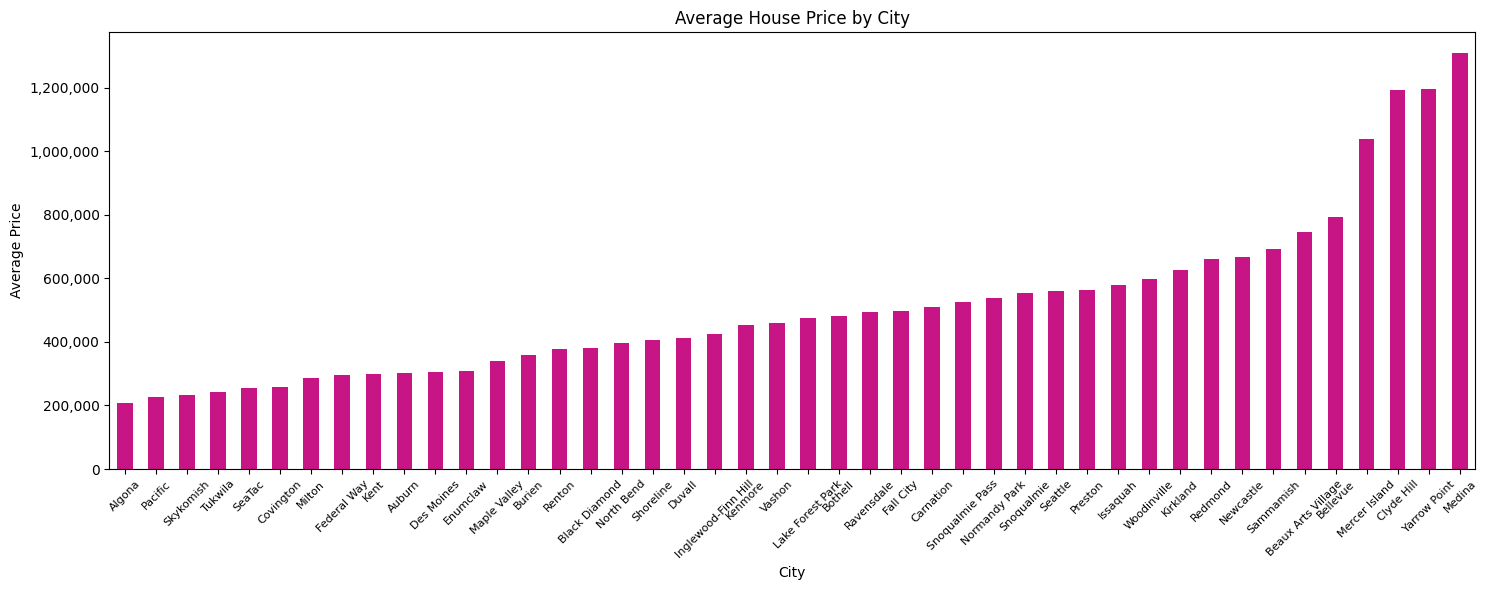

In [ ]:
# Average House Price by City

import matplotlib.ticker as ticker

avg_price_by_city = df2.groupby('city')['price'].mean().sort_values()
plt.figure(figsize=(15, 6))
avg_price_by_city.plot(kind='bar', color='mediumvioletred')
plt.title('Average House Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

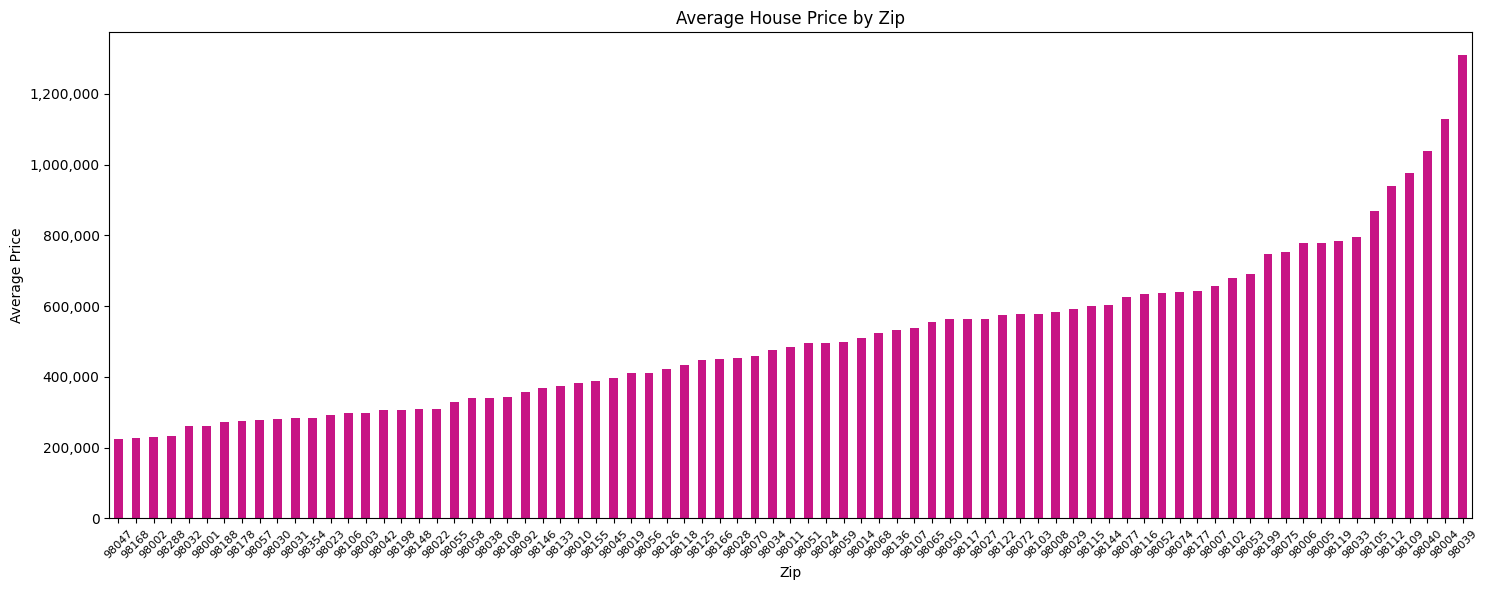

In [ ]:
# Average House Price by zip

import matplotlib.ticker as ticker

avg_price_by_city = df2.groupby('zip')['price'].mean().sort_values()
plt.figure(figsize=(15, 6))
avg_price_by_city.plot(kind='bar', color='mediumvioletred')
plt.title('Average House Price by Zip')
plt.xlabel('Zip')
plt.ylabel('Average Price')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
df2[df2.zip==98001].city.value_counts()

,count
city,
Auburn,57
Algona,5
Federal Way,4


In [ ]:
df2[df2.city=='Auburn'].zip.value_counts()

,count
zip,
98092,83
98001,57
98002,35


Dropping useless and unreliable columns
* date - Weak Correlation with price
* street - Too much unique values in categorical data
* statezip, zip - similar to city but relaionship is (many to many) hence will confuse model.
* country - useless as same for all rows, will have no impact on prediction.

In [ ]:
# Dropping useless columns
useless_cols = ['date', 'street','statezip','state','zip', 'country']
df3=df2.drop(columns=useless_cols)
df3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object')

### Feature creation
* Depicting new features
* Encoding categorical features

In [9]:
# Convert 'date' column to datetime format
df2['date'] = pd.to_datetime(df2['date'])

In [10]:
df2['built_before_years'] = df2.date.dt.year-df2.yr_built
df2['renovated_before_years'] = df2.date.dt.year- df2.yr_renovated
df2.loc[df2.renovated_before_years == 2014,'renovated_before_years']=0

Text(0.5, 1.0, '')

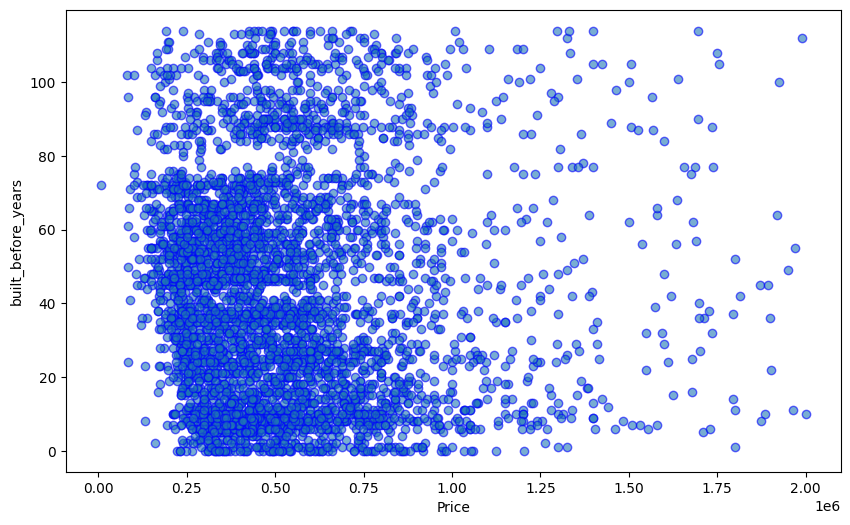

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df2.price, df2.built_before_years, alpha=0.6, edgecolors='b')
plt.xlabel('Price')
plt.ylabel('built_before_years')
plt.title('')

Text(0.5, 1.0, '')

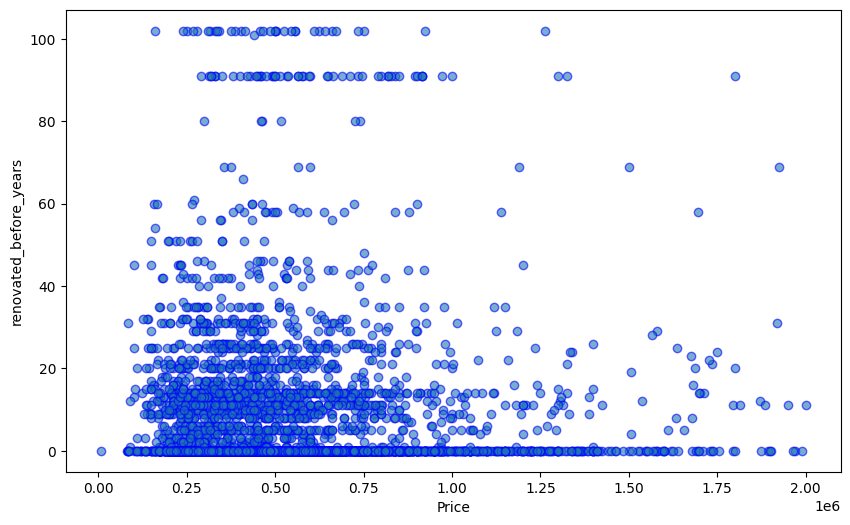

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df2.price, df2.renovated_before_years, alpha=0.6, edgecolors='b')
plt.xlabel('Price')
plt.ylabel('renovated_before_years')
plt.title('')

In [ ]:
print("Shape before one hot encoding",df3.shape)
df3 = pd.get_dummies(df3, columns=['city'], prefix=['city'])
print("Shape after one hot encoding",df3.shape)
df3.head()

Shape before one hot encoding (4486, 14)
Shape after one hot encoding (4486, 57)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,False,False,True,False,False,False,False,False,False,False
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,False,False,False,False,False,False,False,False,False,False
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,False,False,False,False,False,False,False,False,False,False
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,False,False,False,False,False,False,False,False,False,False
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,...,False,True,False,False,False,False,False,False,False,False


## Machine Learning
* Splitting train and test data
* Model Creation and training
* Predicting and Evalutating model

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
x=df3.drop(columns='price') # Features
y=df3.price                 # Label

# Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

# Predictions
y_pred = model.predict(x_test)

LinearRegression()

In [ ]:
# Model Evaluation
print(f"R Square Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

R Square Score: 0.6836703743855294
Mean Squared Error: 24463848205.197205
Mean Absolute Error: 104725.42237176065


Text(0.5, 1.0, 'Distribution of Residuals')

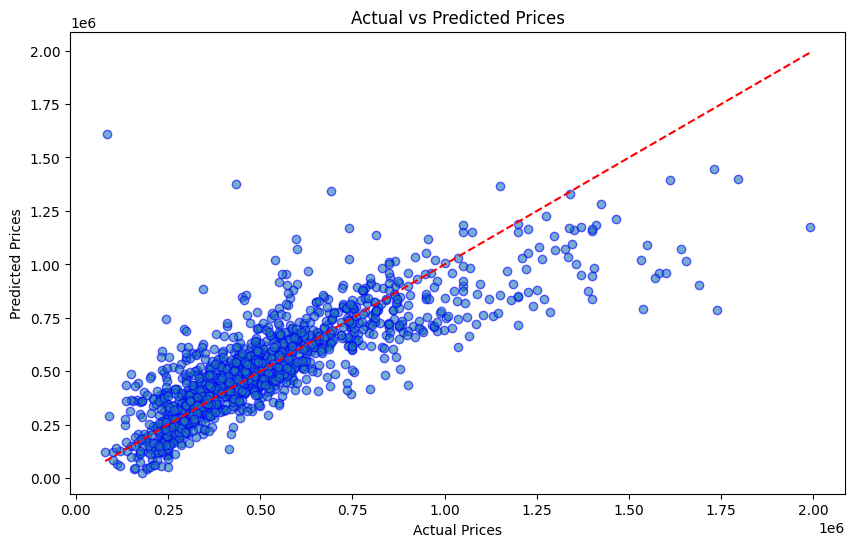

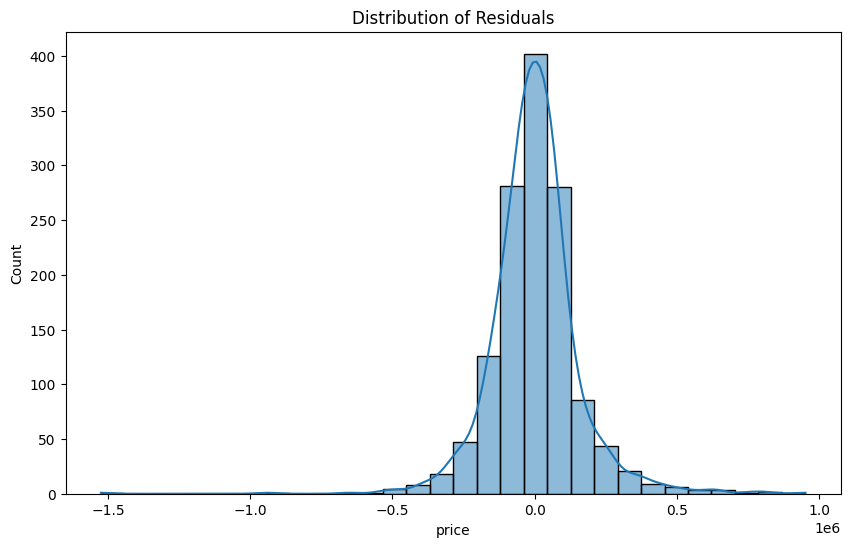

In [ ]:
# Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')